In [38]:
file_path = r'D:\MD_file\date\0217\size-effct\cube19kmsd_out_out.lmp'

In [40]:
class Atom:
    def __init__(self, **kwargs):
        # 动态设置属性，kwargs会传递一个字典，键是列名，值是对应的列数据
        for key, value in kwargs.items():
            setattr(self, key, value)

    def __repr__(self):
        # 输出所有属性，以便查看
        return f"Atom({', '.join([f'{key}={getattr(self, key)}' for key in self.__dict__])})"


def parse_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

        page_start = 0  # 初始位置
        all_pages = []  # 存储所有页的数据，每页的数据是一个列表

        while page_start < len(lines):
            # 获取第4行的num_atoms（当前页的原子数量）
            num_atoms_line = lines[page_start + 3].strip()  # 每一页的num_atoms在第4行
            num_atoms = int(num_atoms_line.split()[-1])  # 提取num_atoms

            # 获取第9行的列名，ITEM: ATOMS之后的列名
            column_names = lines[page_start + 8].strip().split()[2:]  # 从第9行开始，提取列名
            
            # 从第10行开始读取数据
            atoms = []
            for i in range(page_start + 9, page_start + 9 + num_atoms):
                line_data = lines[i].strip().split()
                if len(line_data) == len(column_names):  # 确保行数据和列数匹配
                    atom_data = dict(zip(column_names, line_data))
                    atom = Atom(**atom_data)  # 动态创建Atom实例
                    atoms.append(atom)

            # 将当前页的atoms数据加入到all_pages中
            all_pages.append(atoms)

            # 更新page_start为下一页的起始位置
            page_start += num_atoms + 9  # 当前页的长度是num_atoms + 9（包括页头）

        return all_pages


# 使用示例
file_path = file_path  # 将此处路径替换为实际路径
all_data = parse_data(file_path)
print(f'数据共有{len(all_data)}页。')

数据共有19页。


all_data[0]

In [43]:
from collections import defaultdict
import numpy as np


def analyze_by_type(all_pages):
    # 用于存储每一页的统计结果
    all_analysis_results = []
    
    for page_data in all_pages:
        # 1. 按照atom.type分类
        type_data = defaultdict(lambda: {'vx': [], 'vy': [], 'vz': [], 'fx': [], 'fy': [], 'fz': []})

        # 分类存储数据
        for atom in page_data:
            type_data[atom.type]['vx'].append(float(atom.vx))
            type_data[atom.type]['vy'].append(float(atom.vy))
            type_data[atom.type]['vz'].append(float(atom.vz))
            type_data[atom.type]['fx'].append(float(atom.fx))
            type_data[atom.type]['fy'].append(float(atom.fy))
            type_data[atom.type]['fz'].append(float(atom.fz))

        # 2. 针对每种type统计其属性的分布
        page_analysis = {}
        for atom_type, values in type_data.items():
            page_analysis[atom_type] = {}
            for property_name, data in values.items():
                page_analysis[atom_type][property_name] = {
                    'mean': np.mean(data),
                    'std': np.std(data),
                    'min': np.min(data),
                    'max': np.max(data),
                }
        
        # 将该页的分析结果加入到总的分析结果中
        all_analysis_results.append(page_analysis)

    return all_analysis_results


# 使用示例
# 假设 all_pages 是已加载好的数据（每一页的数据为 Atom 实例的列表）
# all_pages = [[...], [...], ...]，每个元素是一个页面的数据（每个元素是Atom实例）

# 获取所有页的统计分析结果
analysis_results = analyze_by_type(all_data[:2])

# 输出每一页的分析结果
for page_index, page_result in enumerate(analysis_results):
    print(f"Analysis results for Page {page_index + 1}:\n")
    for atom_type, stats in page_result.items():
        print(f"\nType {atom_type}:")
        for property_name, stat in stats.items():
            print(f"  {property_name.capitalize()} - Mean: {stat['mean']:.4f}, Std: {stat['std']:.3f}, Min: {stat['min']:.3f}, Max: {stat['max']:.3f}")


Analysis results for Page 1:


Type 1:
  Vx - Mean: 0.0184, Std: 9.943, Min: -38.980, Max: 38.142
  Vy - Mean: 0.0683, Std: 9.717, Min: -34.014, Max: 37.133
  Vz - Mean: 0.2117, Std: 9.966, Min: -35.516, Max: 38.894
  Fx - Mean: -0.0166, Std: 1.932, Min: -11.033, Max: 8.340
  Fy - Mean: -0.0164, Std: 1.923, Min: -11.449, Max: 7.786
  Fz - Mean: -0.0109, Std: 1.927, Min: -9.008, Max: 8.274

Type 2:
  Vx - Mean: -0.1270, Std: 7.693, Min: -26.991, Max: 24.791
  Vy - Mean: 0.0158, Std: 7.401, Min: -20.425, Max: 23.645
  Vz - Mean: -0.3822, Std: 7.515, Min: -24.321, Max: 27.362
  Fx - Mean: 0.0390, Std: 2.457, Min: -7.740, Max: 7.346
  Fy - Mean: 0.0127, Std: 2.604, Min: -9.258, Max: 9.705
  Fz - Mean: 0.0377, Std: 2.609, Min: -9.462, Max: 8.194

Type 3:
  Vx - Mean: 0.1379, Std: 7.534, Min: -26.137, Max: 22.395
  Vy - Mean: -0.1710, Std: 7.807, Min: -26.110, Max: 24.396
  Vz - Mean: -0.0079, Std: 7.581, Min: -27.656, Max: 24.554
  Fx - Mean: -0.0220, Std: 1.982, Min: -7.660, Max: 8.021
  F

   Row  Type Property      Mean        Std       Min       Max
0          1       vx -0.018380   9.912595 -46.17110  43.74080
1          1       vy -0.013178   9.937238 -40.01400  43.49320
2          1       vz -0.007538   9.906030 -41.86330  51.82130
3          1       fx -0.005040   1.923282 -14.31310  13.11950
4          1       fy -0.003993   1.917202 -12.25980  11.81800
5          1       fz -0.004915   1.919716 -13.76270  11.45890
6          2       vx -0.011470   7.449155 -34.74880  31.25520
7          2       vy -0.022657   7.455018 -30.76030  27.38760
8          2       vz  0.022655   7.447795 -33.24550  30.88300
9          2       fx  0.013448   2.593624 -13.56770  12.87310
10         2       fy  0.015889   2.569581 -12.89430  11.67880
11         2       fz  0.019726   2.578999 -10.92470  12.80710
12         3       vx  0.058351   7.652366 -31.56870  34.60170
13         3       vy -0.014729   7.638960 -29.87100  28.56290
14         3       vz  0.044356   7.617774 -32.82820  3

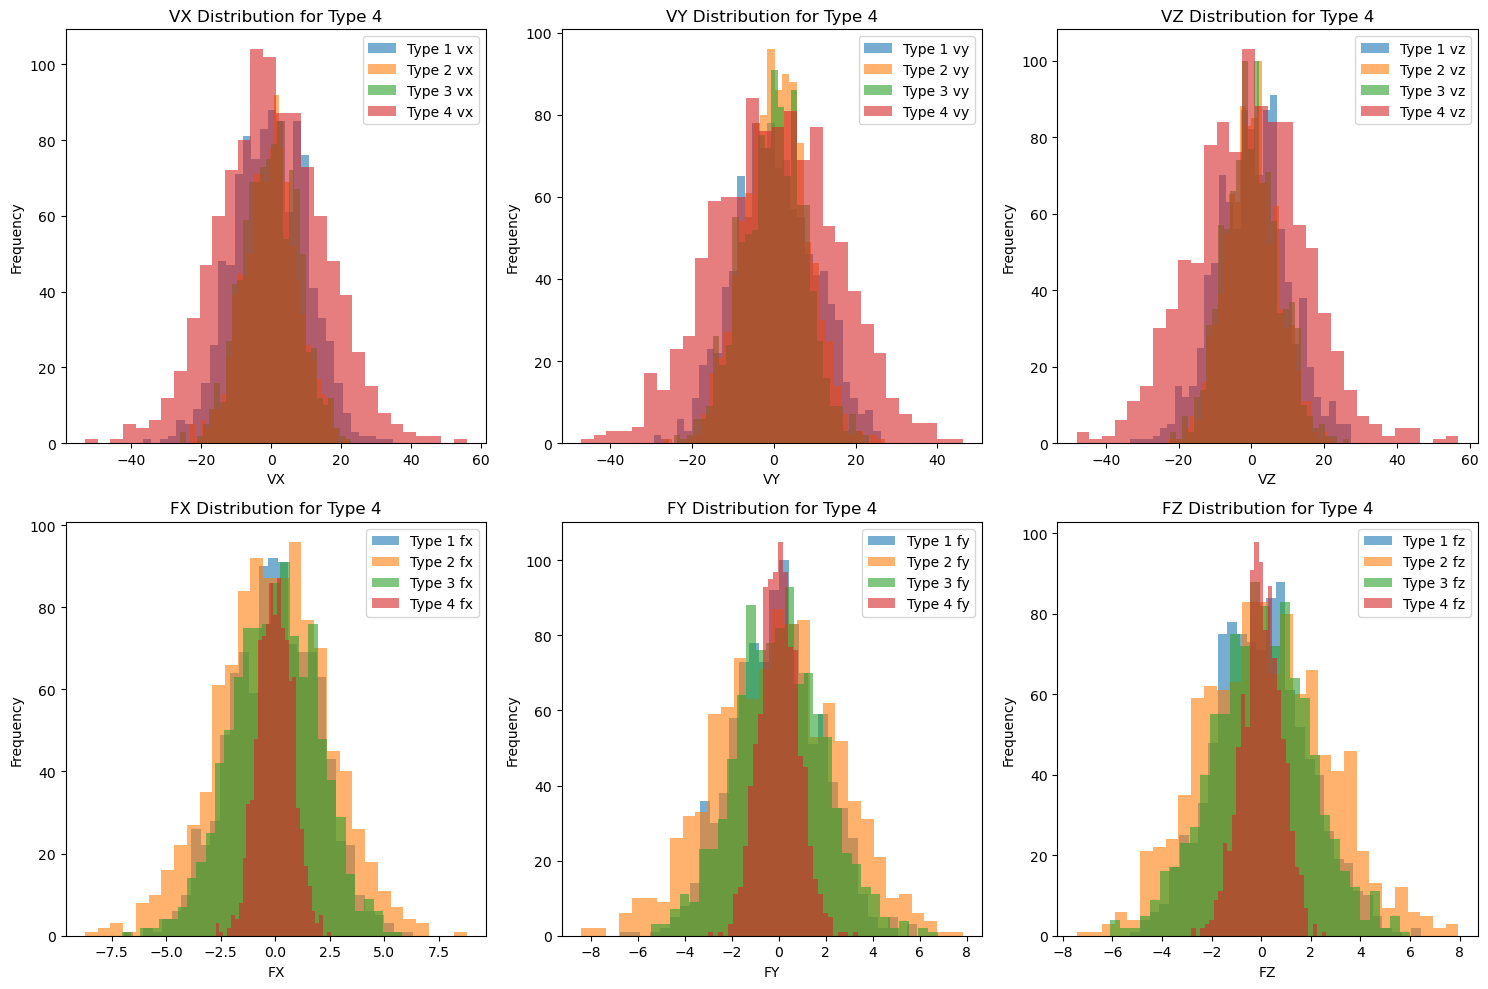

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import numpy as np

class Atom:
    def __init__(self, **kwargs):
        # 动态设置属性，kwargs会传递一个字典，键是列名，值是对应的列数据
        for key, value in kwargs.items():
            setattr(self, key, value)

    def __repr__(self):
        # 输出所有属性，以便查看
        return f"Atom({', '.join([f'{key}={getattr(self, key)}' for key in self.__dict__])})"


def analyze_by_type(all_pages):
    # 创建一个字典用于存储每个type对应的所有原子数据
    type_data = defaultdict(lambda: {'vx': [], 'vy': [], 'vz': [], 'fx': [], 'fy': [], 'fz': []})

    # 按照 atom.type 分类，合并所有页中相同类型的原子数据
    for page_data in all_pages:
        for atom in page_data:
            type_data[atom.type]['vx'].append(float(atom.vx))
            type_data[atom.type]['vy'].append(float(atom.vy))
            type_data[atom.type]['vz'].append(float(atom.vz))
            type_data[atom.type]['fx'].append(float(atom.fx))
            type_data[atom.type]['fy'].append(float(atom.fy))
            type_data[atom.type]['fz'].append(float(atom.fz))

    # 计算每种type的统计信息
    all_analysis_results = {}
    for atom_type, values in type_data.items():
        all_analysis_results[atom_type] = {}
        for property_name, data in values.items():
            all_analysis_results[atom_type][property_name] = {
                'mean': np.mean(data),
                'std': np.std(data),
                'min': np.min(data),
                'max': np.max(data),
            }

    return all_analysis_results


def print_statistics(analysis_results):
    # 创建一个DataFrame用于展示统计信息
    rows = []
    columns = ['Row  Type', 'Property', 'Mean', 'Std', 'Min', 'Max']
    
    for atom_type, stats in analysis_results.items():
        for property_name, stat in stats.items():
            row = [atom_type, property_name, stat['mean'], stat['std'], stat['min'], stat['max']]
            rows.append(row)

    # 创建DataFrame
    df = pd.DataFrame(rows, columns=columns)
    
    # 打印表格
    print(df)


def plot_statistics(analysis_results):
    # 设置一个大图，包含6个子图 (vx, vy, vz, fx, fy, fz)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()  # 将2x3的矩阵展平成一维
    
    # 对每个原子类型的数据分别绘制直方图
    for atom_type, stats in analysis_results.items():
        for property_name, stat in stats.items():
            data = np.random.normal(stat['mean'], stat['std'], 1000)  # 假设正态分布
            ax = axes[['vx', 'vy', 'vz', 'fx', 'fy', 'fz'].index(property_name)]
            ax.hist(data, bins=30, alpha=0.6, label=f'Type {atom_type} {property_name}')
            ax.set_title(f'{property_name.upper()} Distribution for Type {atom_type}')
            ax.set_xlabel(property_name.upper())
            ax.set_ylabel('Frequency')
            ax.legend()

    plt.tight_layout()
    plt.show()


# 使用示例
# 假设 all_pages 是已加载好的数据（每一页的数据为 Atom 实例的列表）
# all_pages = [[...], [...], ...]，每个元素是一个页面的数据（每个元素是Atom实例）

# 获取所有页的统计分析结果
analysis_results = analyze_by_type(all_data)

# 打印统计结果表格
print_statistics(analysis_results)

# 绘制统计结果
plot_statistics(analysis_results)


In [49]:
A48 = analysis_results.copy()

In [36]:
A24 = analysis_results.copy()

In [14]:
A12 = analysis_results.copy()

In [25]:
A18 = analysis_results.copy()

In [61]:
A12

{'1': {'vx': {'mean': -0.005698311272928393,
   'std': 10.009210577981488,
   'min': -40.0835,
   'max': 40.8135},
  'vy': {'mean': -0.0180081252650014,
   'std': 10.043186326550513,
   'min': -44.9,
   'max': 41.9418},
  'vz': {'mean': -0.03736991872522813,
   'std': 9.987802266055875,
   'min': -41.2709,
   'max': 40.1382},
  'fx': {'mean': 0.005710315489906901,
   'std': 1.9308130033061652,
   'min': -14.0304,
   'max': 10.0632},
  'fy': {'mean': -0.006990962070236887,
   'std': 1.9378488569417023,
   'min': -12.1546,
   'max': 12.1176},
  'fz': {'mean': -0.00933950400958614,
   'std': 1.9394681768749753,
   'min': -12.2973,
   'max': 11.2461}},
 '2': {'vx': {'mean': 0.10735535984883399,
   'std': 7.53411011666166,
   'min': -30.6505,
   'max': 33.5784},
  'vy': {'mean': -0.06864535579316065,
   'std': 7.534219161861066,
   'min': -28.8734,
   'max': 30.7554},
  'vz': {'mean': 0.05058165388515069,
   'std': 7.515836341370811,
   'min': -28.3637,
   'max': 27.6295},
  'fx': {'mean': 

In [57]:
print_statistics(A18)

   Row  Type Property      Mean        Std       Min       Max
0          1       vx -0.025909   9.965160 -44.91920  41.13150
1          1       vy  0.000047   9.983595 -41.95190  40.35900
2          1       vz -0.001980   9.950333 -38.66540  40.97250
3          1       fx  0.000870   1.919677 -11.24960  12.29850
4          1       fy  0.010387   1.931131 -11.70850  14.61190
5          1       fz  0.003236   1.932926 -12.98480  16.93200
6          2       vx  0.073734   7.441181 -27.09150  28.84270
7          2       vy -0.023058   7.510904 -26.43290  27.72630
8          2       vz  0.012094   7.557714 -28.03480  29.43680
9          2       fx  0.012311   2.579298 -15.10460  12.49190
10         2       fy -0.032055   2.609668 -13.54720  12.57420
11         2       fz -0.015006   2.645568 -11.55110  14.94210
12         3       vx -0.055632   7.639730 -29.24310  35.44280
13         3       vy  0.049982   7.633255 -29.49780  35.84910
14         3       vz -0.019002   7.688636 -29.44810  2

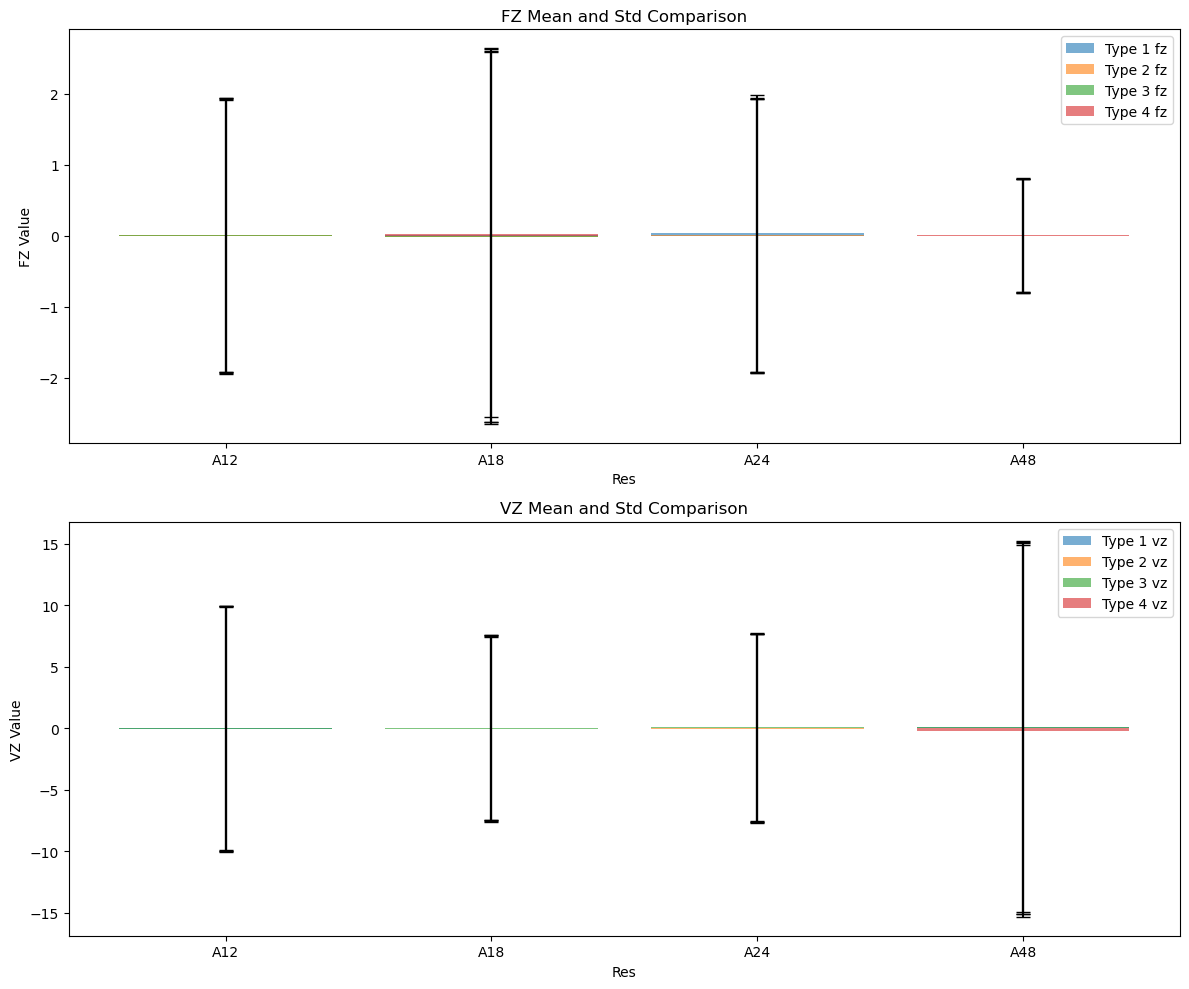

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 假设你的 `analysis_results` 已经按照给定格式进行处理（例如来自A12, A18, A24, A48等）

def plot_statistics_comparison(analysis_results_A12, analysis_results_A18, analysis_results_A24, analysis_results_A48):
    # 提取每个type和属性的mean和std数据
    res_names = ['A12', 'A18', 'A24', 'A48']
    properties = ['fz', 'vz']
    types = ['1', "2", "3", "4"]
    
    # 存储每个属性在不同res下的mean和std
    mean_data = {property: [] for property in properties}
    std_data = {property: [] for property in properties}

    # 从每个res数据中提取mean和std
    for res_name, analysis_results in zip(res_names, [analysis_results_A12, analysis_results_A18, analysis_results_A24, analysis_results_A48]):
        for property in properties:
            mean_values = []
            std_values = []
            for atom_type in types:
                stat = analysis_results[atom_type][property]
                mean_values.append(stat['mean'])
                std_values.append(stat['std'])
            mean_data[property].append(mean_values)
            std_data[property].append(std_values)
    
    # 转换为NumPy数组，方便后续绘图
    mean_data = {property: np.array(mean_data[property]).T for property in properties}
    std_data = {property: np.array(std_data[property]).T for property in properties}

    # 绘制结果
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    # 绘制fz的mean和std
    for i, property in enumerate(properties):
        ax = axes[i]
        ax.bar(res_names, mean_data[property].T[0], yerr=std_data[property].T[0], label=f'Type 1 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, mean_data[property].T[1], yerr=std_data[property].T[1], label=f'Type 2 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, mean_data[property].T[2], yerr=std_data[property].T[2], label=f'Type 3 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, mean_data[property].T[3], yerr=std_data[property].T[3], label=f'Type 4 {property}', capsize=5, alpha=0.6)
        
        ax.set_title(f'{property.upper()} Mean and Std Comparison')
        ax.set_xlabel('Res')
        ax.set_ylabel(f'{property.upper()} Value')
        ax.legend()

    plt.tight_layout()
    plt.show()


# 使用示例
# 假设 analysis_results_A12, analysis_results_A18, analysis_results_A24, analysis_results_A48 是从每个res文件中提取的统计结果
# 每个结果的结构应如下：
# {
#   1: {'fz': {'mean': value, 'std': value, 'min': value, 'max': value}, 'vz': {'mean': value, 'std': value, 'min': value, 'max': value}},
#   2: {'fz': {'mean': value, 'std': value, 'min': value, 'max': value}, 'vz': {'mean': value, 'std': value, 'min': value, 'max': value}},
#   3: {'fz': {'mean': value, 'std': value, 'min': value, 'max': value}, 'vz': {'mean': value, 'std': value, 'min': value, 'max': value}},
#   4: {'fz': {'mean': value, 'std': value, 'min': value, 'max': value}, 'vz': {'mean': value, 'std': value, 'min': value, 'max': value}},
# }

# 示例数据结构：
# analysis_results_A12 = {1: {'fz': {'mean': 0.1, 'std': 0.2, 'min': -0.5, 'max': 1.0}, 'vz': {'mean': 0.2, 'std': 0.3, 'min': -0.4, 'max': 1.1}}, ... }
# 调用函数进行比较：
plot_statistics_comparison(A12, A18, A24, A48)


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_statistics_comparison(analysis_results_A12, analysis_results_A18, analysis_results_A24, analysis_results_A48):
    # 提取每个type和属性的mean和std数据
    res_names = ['A12', 'A18', 'A24', 'A48']
    properties = ['fz', 'vz']
    types = ['1', '2', '3', '4']  # 更新为字符串类型
    
    # 存储每个属性在不同res下的mean和std
    mean_data = {property: [] for property in properties}
    std_data = {property: [] for property in properties}

    # 从每个res数据中提取mean和std
    for res_name, analysis_results in zip(res_names, [analysis_results_A12, analysis_results_A18, analysis_results_A24, analysis_results_A48]):
        for property in properties:
            mean_values = []
            std_values = []
            for atom_type in types:
                # 确保存在对应的type和property
                if atom_type in analysis_results and property in analysis_results[atom_type]:
                    stat = analysis_results[atom_type][property]
                    mean_values.append(stat['mean'])
                    std_values.append(stat['std'])
                else:
                    mean_values.append(np.nan)  # 如果找不到，则设置为NaN
                    std_values.append(np.nan)   # 如果找不到，则设置为NaN
            mean_data[property].append(mean_values)
            std_data[property].append(std_values)
    
    # 转换为NumPy数组，方便后续绘图
    mean_data = {property: np.array(mean_data[property]).T for property in properties}
    std_data = {property: np.array(std_data[property]).T for property in properties}

    # 绘制结果
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # 绘制fz和vz的mean
    for i, property in enumerate(properties):
        ax = axes[i]
        ax.bar(res_names, mean_data[property].T[0], yerr=std_data[property].T[0], label=f'Type 1 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, mean_data[property].T[1], yerr=std_data[property].T[1], label=f'Type 2 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, mean_data[property].T[2], yerr=std_data[property].T[2], label=f'Type 3 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, mean_data[property].T[3], yerr=std_data[property].T[3], label=f'Type 4 {property}', capsize=5, alpha=0.6)
        
        ax.set_title(f'{property.upper()} Mean Comparison')
        ax.set_xlabel('Res')
        ax.set_ylabel(f'{property.upper()} Value')
        ax.legend()

    # 绘制std
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # 绘制fz和vz的std
    for i, property in enumerate(properties):
        ax = axes[i]
        ax.bar(res_names, std_data[property].T[0], label=f'Type 1 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, std_data[property].T[1], label=f'Type 2 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, std_data[property].T[2], label=f'Type 3 {property}', capsize=5, alpha=0.6)
        ax.bar(res_names, std_data[property].T[3], label=f'Type 4 {property}', capsize=5, alpha=0.6)

        ax.set_title(f'{property.upper()} Standard Deviation Comparison')
        ax.set_xlabel('Res')
        ax.set_ylabel(f'{property.upper()} Value')
        ax.legend()

    plt.tight_layout()
    plt.show()

# 假设 analysis_results_A12, analysis_results_A18, analysis_results_A24, analysis_results_A48 是已经加载的字典数据
# 调用函数进行比较：
# plot_statistics_comparison(analysis_results_A12, analysis_results_A18, analysis_results_A24, analysis_results_A48)


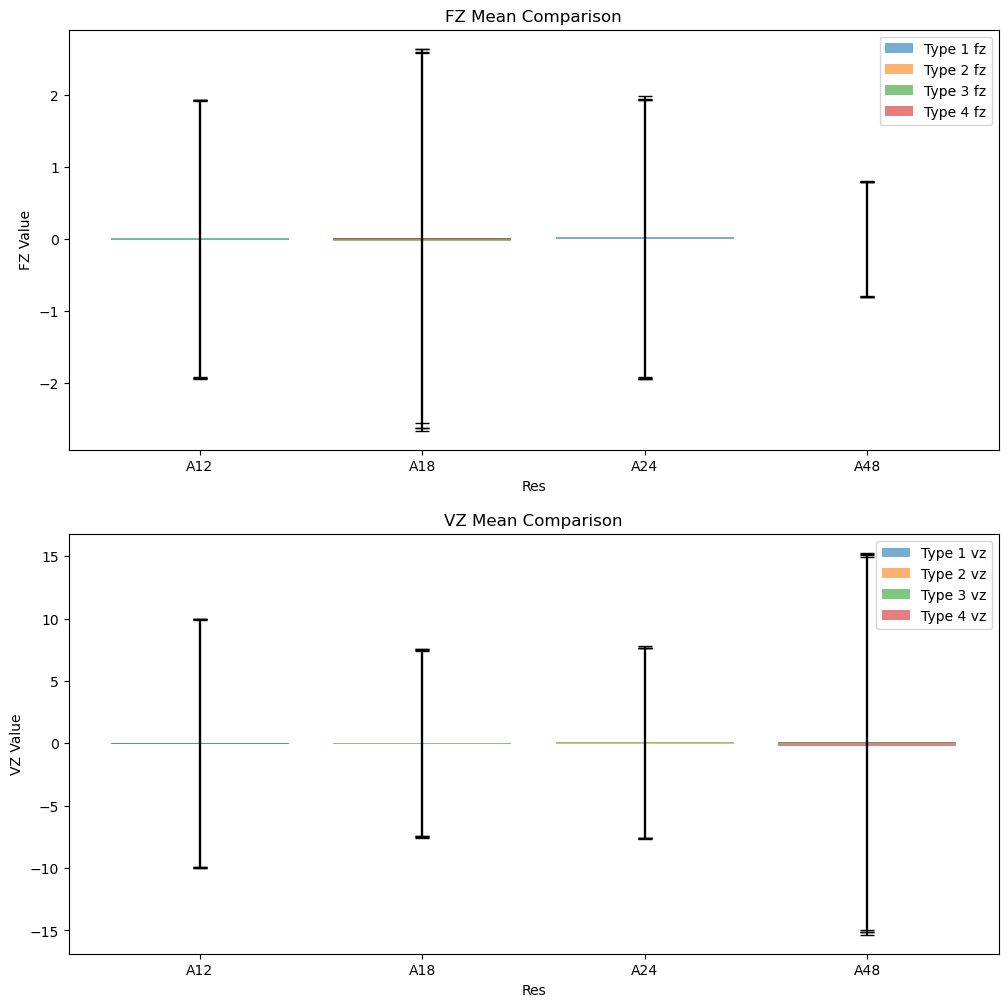

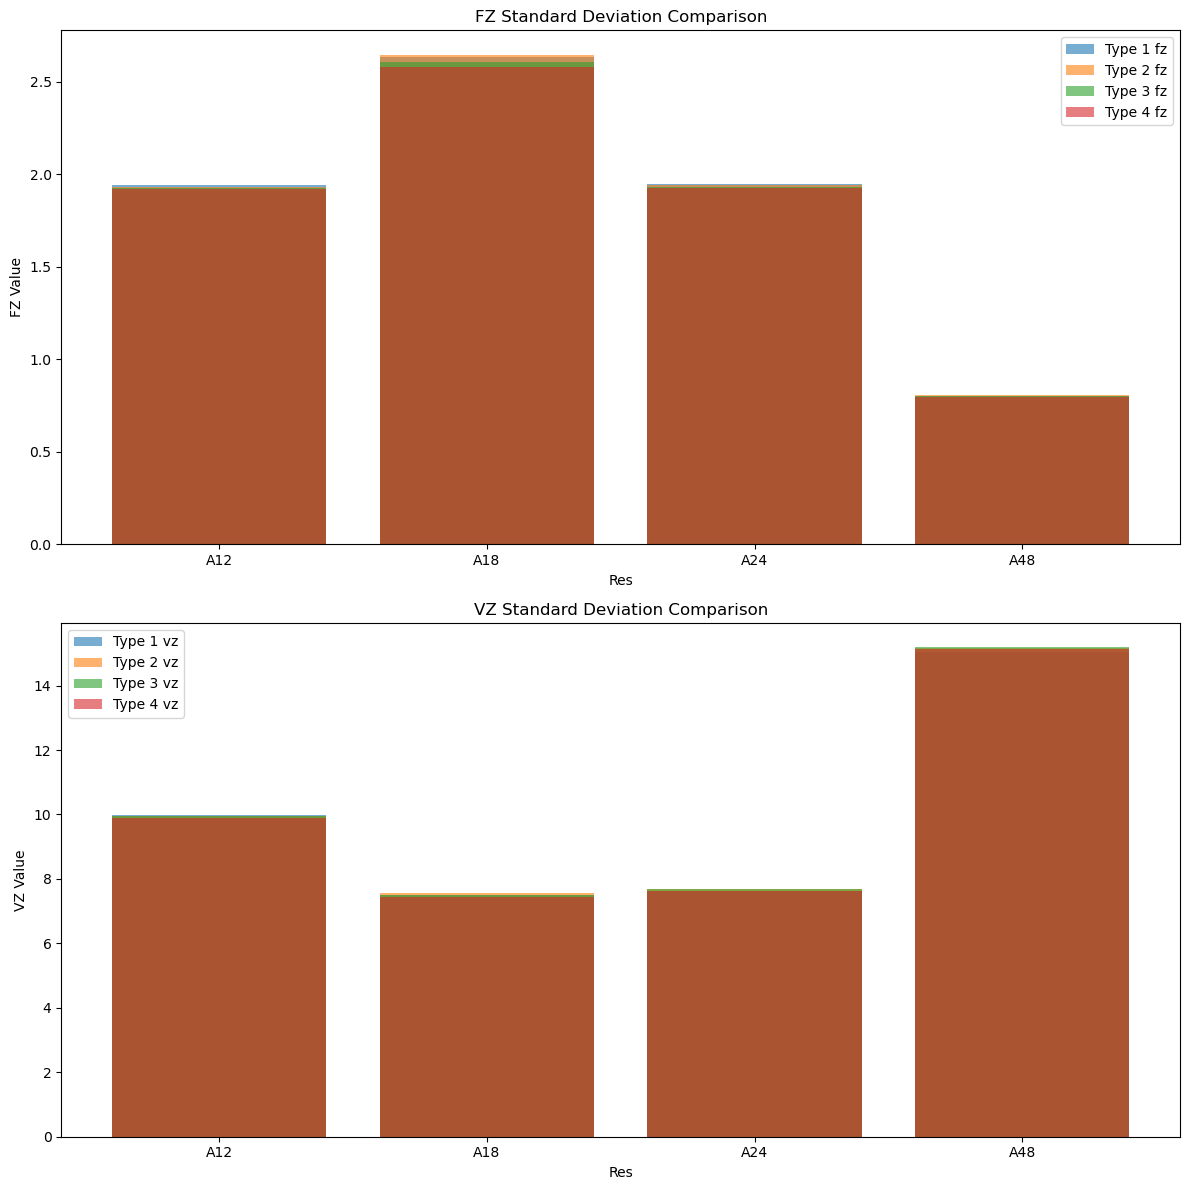

In [67]:
plot_statistics_comparison(A12, A18, A24, A48)